In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid=pd.read_csv('covid_19_india.csv')

In [3]:
covid.head() #head used for first 5 display,#tail used for last 5 display

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Nagaland#', 'Jharkhand#',
       'Madhya Pradesh#'], dtype=object)

In [5]:
df=covid.loc[(covid['State/UnionTerritory']=='Tamil Nadu')]

In [6]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
61,62,07/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
67,68,08/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
79,80,09/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
94,95,10/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1
105,106,11/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1


In [7]:
import plotly.offline as py
import plotly.graph_objs as go

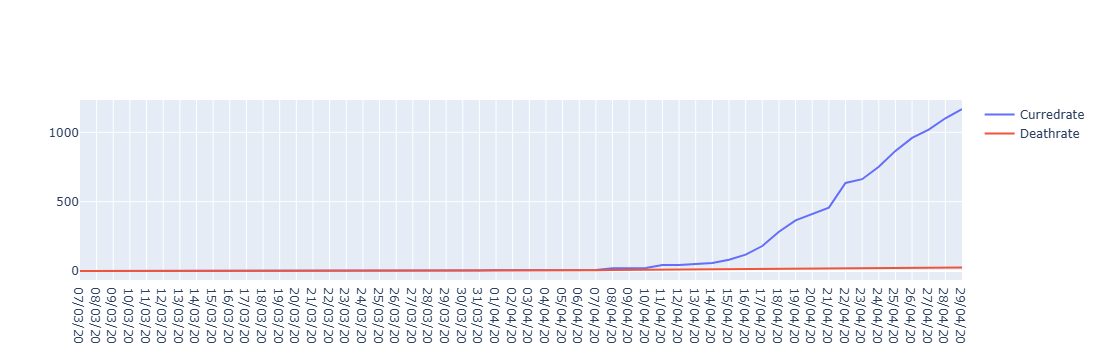

In [43]:
curred_rate=go.Scatter(x=df['Date'],y=df['Cured'],name='Curredrate')
death_rate=go.Scatter(x=df['Date'],y=df['Deaths'],name='Deathrate')
py.iplot([curred_rate,death_rate])

In [8]:
df1=df[['Confirmed']]
df1=df1.values

In [9]:
train_size=int(len(df1)*0.80)
test_size=len(df1)- train_size

In [10]:
train,test=df1[0:train_size,:],df1[train_size:len(df1),:]

In [11]:
def create_dataset(dataset, look_back=1):
    datax, datay = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:i + look_back, 0]
        datax.append(a)
        datay.append(dataset[i + look_back, 0])
    return np.array(datax), np.array(datay)

In [12]:
look_back = 2
trainx, trainy = create_dataset(train, look_back=look_back)
testx, testy = create_dataset(test, look_back=look_back)


In [13]:
testx


array([[1372, 1477],
       [1477, 1520],
       [1520, 1596],
       [1596, 1629],
       [1629, 1683],
       [1683, 1755],
       [1755, 1821],
       [1821, 1885]], dtype=int64)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model=LinearRegression()

In [20]:
model.fit(trainx,trainy)

LinearRegression()

In [22]:
predict1=model.predict(testx)

In [23]:
df=pd.DataFrame({'Actual':testy.flatten(),'Prediction':predict1.flatten()})
df

,Actual,Prediction
0,1520,1571.910623
1,1596,1602.717777
2,1629,1689.133550
3,1683,1713.803372
4,1755,1774.655367
5,1821,1853.549419
6,1885,1920.824597
7,1937,1986.917148


<Axes: >

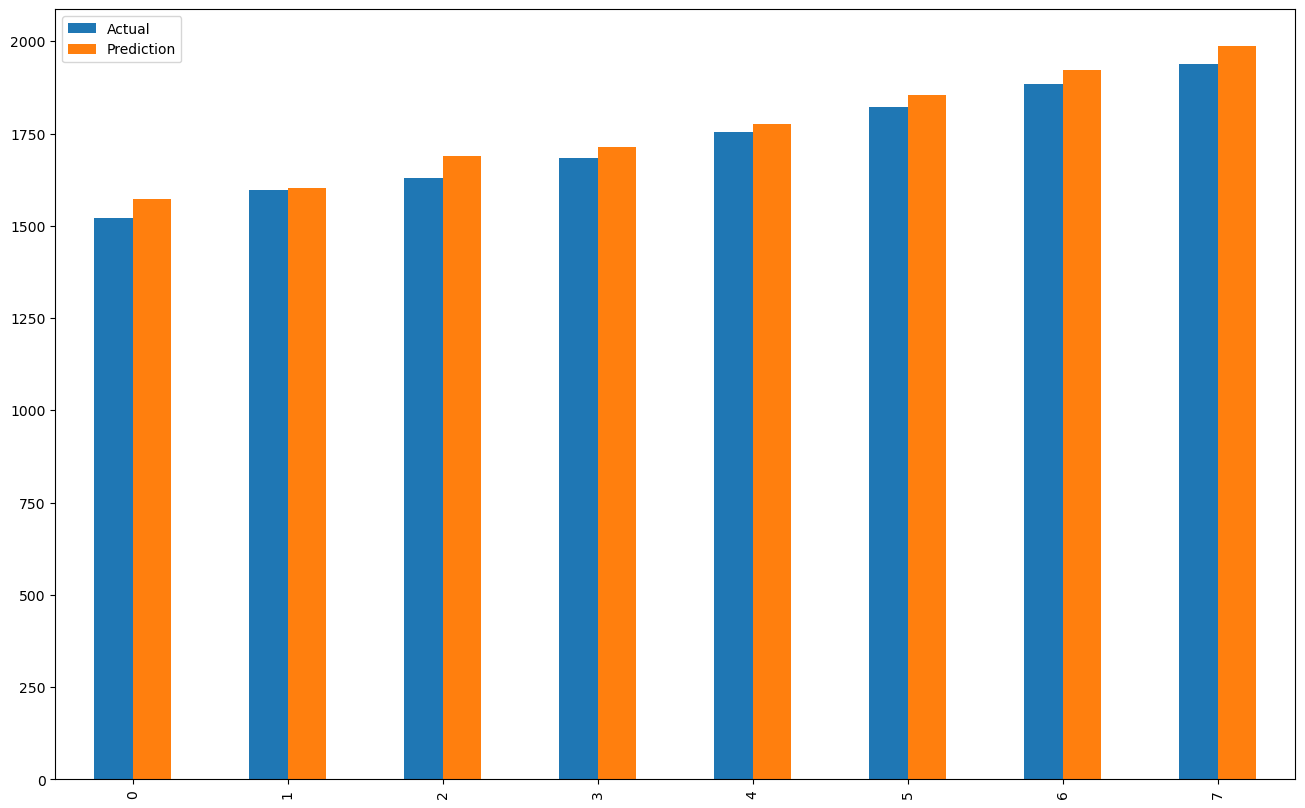

In [25]:
df.plot(kind='bar',figsize=(16,10))